----------------------------------
# hw5 - Pandas cont'
----------------------------------

In [2]:
#import libraies

In [9]:
#remove warning
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
# import data prime-indians-diabetes.csv

In [2]:
df = pd.read_csv("pima-indians-diabetes.csv")

In [6]:
# check necesseray column attributes, data quality issues (e.g. null values), perform basic statistical analyses on the data

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DPF,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Insight
- It appears there is no missing data
- Outcome column is binary, 1 or 0 
- Scale of columns varies, there are possible outlier in the data, as seen by big absolute difference between 75th percentile and max values  

In [8]:
# check skewnes of the data using df.skew()

In [7]:
df.skew()

Pregnancies      0.901674
Glucose          0.173754
BloodPressure   -1.843608
SkinThickness    0.109372
Insulin          2.272251
BMI             -0.428982
DPF              1.919911
Age              1.129597
Outcome          0.635017
dtype: float64

Skewness is a meassure of symetry for a given column.

**If skewness value is zero, then it is not skewed**

**If it is less than zero, then negatively skewed (left tail) and if greater than zero then positively skewed (right tail)**

More insights about data:

- Data for all the attributes are skewed, especially for the variable "Insulin".

- The mean for "Insulin" is 80(rounded) while the median is 30.5 which clearly indicates an extreme long tail on the right.

In [10]:
# use seaborn: sns.histplot(df['column_name']) to plot histogram for data columns with skewness greater than 1

In [13]:
#beautify seaborn graphs
sns.set_style(style='darkgrid')

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

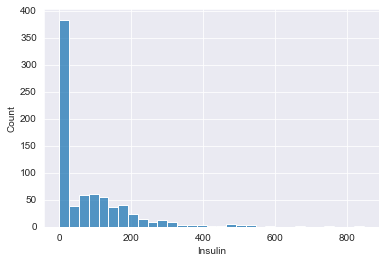

In [14]:
sns.histplot(df['Insulin'])

In [12]:
# calcualte the % distrubtion of variable Outcome

In [16]:
round(df['Outcome'].value_counts(normalize=True)*100,2)

0    65.1
1    34.9
Name: Outcome, dtype: float64

In [13]:
# calcualte the mean and median of all column by column 'Outcome' to understand how the data is distributed amongst the various fields

In [20]:
# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

In [21]:
df.groupby(["Outcome"]).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
Outcome,,,,,,,,
0,3.30,109.98,68.18,19.66,68.79,30.30,0.43,31.19
1,4.87,141.26,70.82,22.16,100.34,35.14,0.55,37.07


In [22]:
df.groupby(["Outcome"]).median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
Outcome,,,,,,,,
0,2,107,70,21,39,30.05,0.34,27
1,4,140,74,27,0,34.25,0.45,36


#### Insights

- **All the features have higher mean for people having diabetes**

- **All the features have higher median for people having diabetes except "Insulin" which is understood as diabetes patient do not produce insulin**

In [15]:
# Check distributions by Outcome
# use code: sns.pairplot(df, hue = 'Outcome')

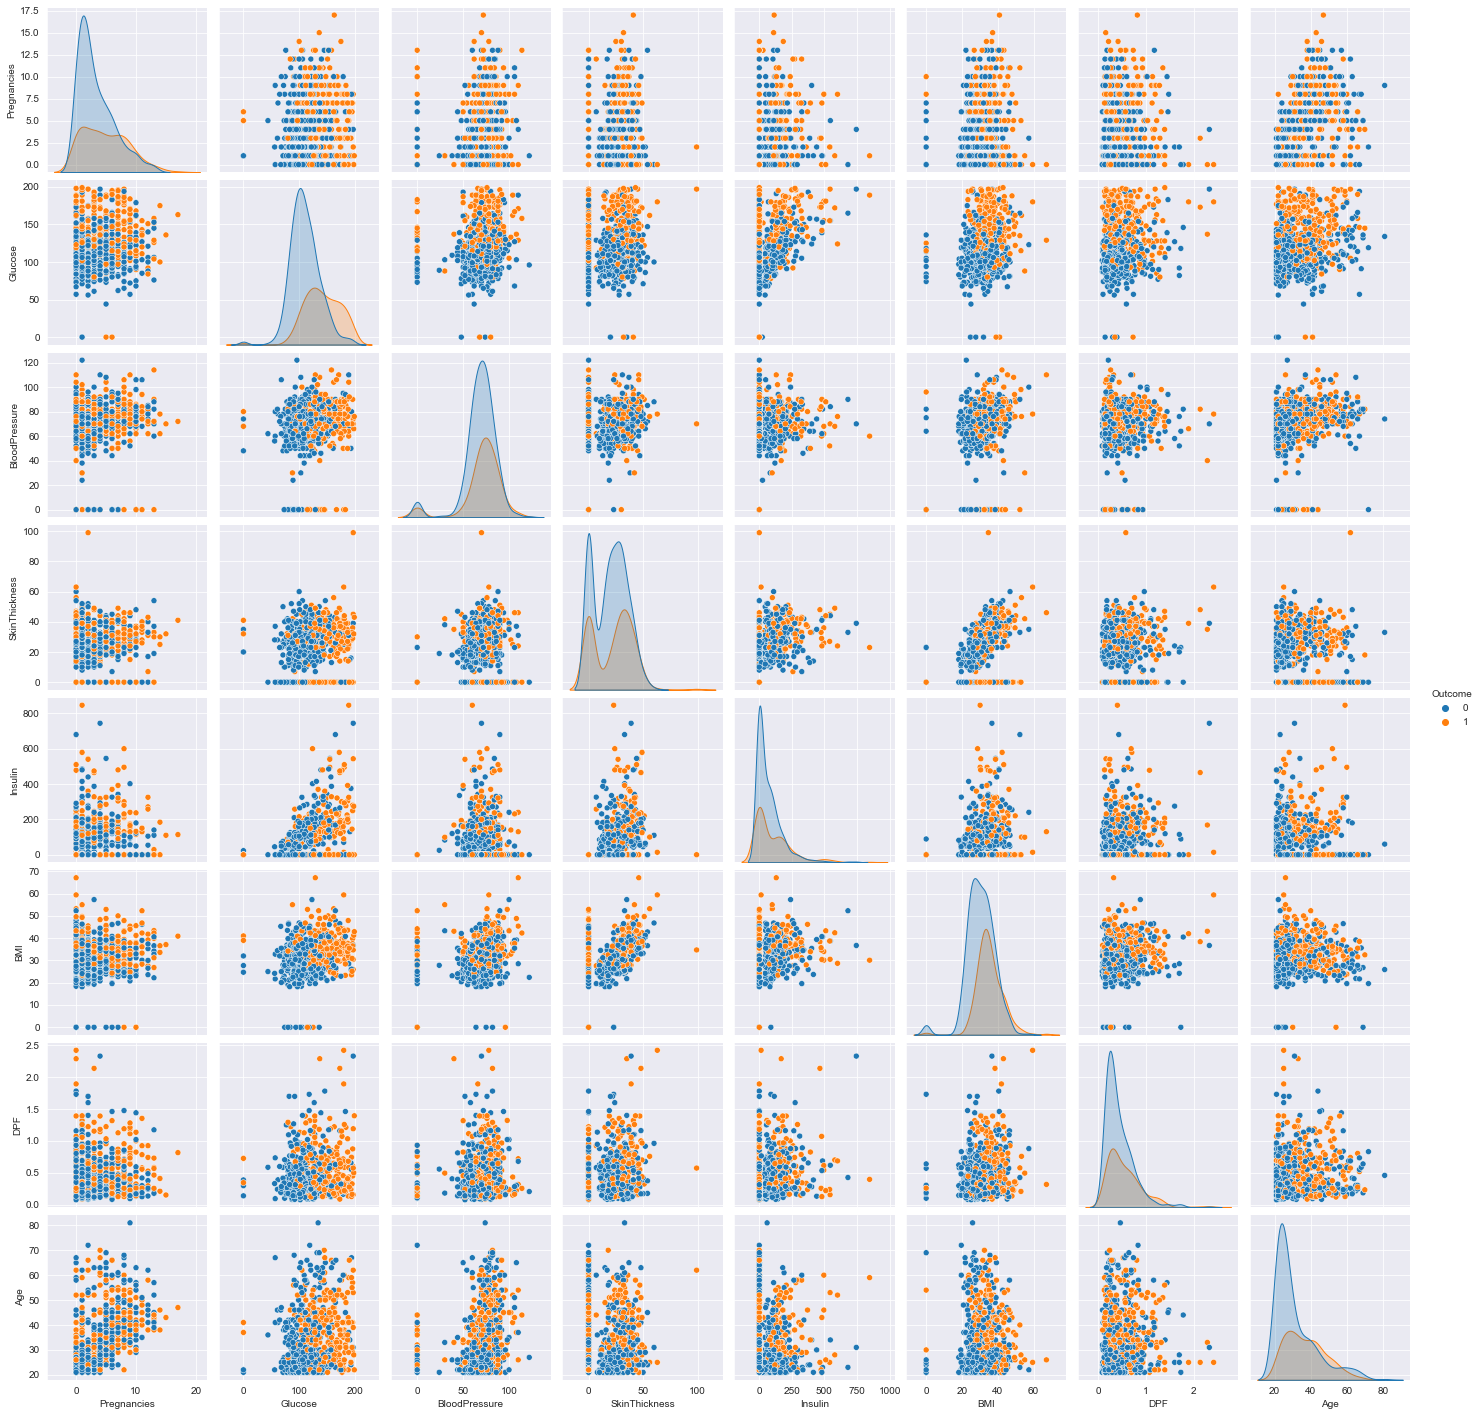

In [23]:
sns.pairplot(df, hue = 'Outcome')

### No clear relationship for any feature.

### Number of people having diabetes are higher for people with higher "BMI" and "Glucose".

# <a id='link3'>Data Preprocessing</a>

#### Exampes of data standardization using mean and standard deviation

In [24]:
# implement 4 ways of Z score standardization

# Standardization of entire data set using "zscore" function from scipy.stats package 
df_z = df.apply(zscore)

# Manual standardization of individual fields
df['Age_Z_Manual'] = (df['Age']-np.mean(df['Age']))/np.std(df['Age'])

# Using "zscore" function from scipy.stats package 
df['Age_Z_Scipy'] = df[['Age']].apply(zscore)

# Using "StandardScaler" function from sklearn.preprocessing package - useful for machine learning models 
df['Age_Z_Sklearn'] = StandardScaler().fit_transform(df[['Age']])

In [25]:
# View the new data set with all standardized fields
df_z.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,0.64,0.85,0.15,0.91,-0.69,0.20,0.47,1.43,1.37
1,-0.84,-1.12,-0.16,0.53,-0.69,-0.68,-0.37,-0.19,-0.73
2,1.23,1.94,-0.26,-1.29,-0.69,-1.10,0.60,-0.11,1.37
3,-0.84,-1.00,-0.16,0.15,0.12,-0.49,-0.92,-1.04,-0.73
4,-1.14,0.50,-1.50,0.91,0.77,1.41,5.48,-0.02,1.37


In [16]:
# View the new data set with new Age standardized fields

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome,Age_Z_Manual,Age_Z_Scipy,Age_Z_Sklearn
0,6,148,72,35,0,33.60,0.63,50,1,1.43,1.43,1.43
1,1,85,66,29,0,26.60,0.35,31,0,-0.19,-0.19,-0.19
2,8,183,64,0,0,23.30,0.67,32,1,-0.11,-0.11,-0.11
3,1,89,66,23,94,28.10,0.17,21,0,-1.04,-1.04,-1.04
4,0,137,40,35,168,43.10,2.29,33,1,-0.02,-0.02,-0.02


### Zscore and Standard Scalar are same.

#### Exampes of data normalization using min and range

In [27]:
# Implement manual normalization
df['Age_Norm_Manual'] = (df['Age']-np.min(df['Age']))/(np.max(df['Age'])-np.min(df['Age']))

# Using "StandardScaler" function from sklearn.preprocessing package - useful for machine learning models 
df['Age_Norm_Sklearn'] = MinMaxScaler().fit_transform(df[['Age']])

In [29]:
# view data with the normalized fields

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome,Age_Z_Manual,Age_Z_Scipy,Age_Z_Sklearn,Age_Norm_Manual,Age_Norm_Sklearn
0,6,148,72,35,0,33.60,0.63,50,1,1.43,1.43,1.43,0.48,0.48
1,1,85,66,29,0,26.60,0.35,31,0,-0.19,-0.19,-0.19,0.17,0.17
2,8,183,64,0,0,23.30,0.67,32,1,-0.11,-0.11,-0.11,0.18,0.18
3,1,89,66,23,94,28.10,0.17,21,0,-1.04,-1.04,-1.04,0.00,0.00
4,0,137,40,35,168,43.10,2.29,33,1,-0.02,-0.02,-0.02,0.20,0.20


In [23]:
# use describe and write down observations of original and normalized columns

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DPF,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
Age_Z_Manual,768.00,0.00,1.00,-1.04,-0.79,-0.36,0.66,4.06


#### Insights

- Age normalized has values 0 to 1, as expected
- Z scipy and sklearn have the same results as the manual
- Z scores of 4 indicates outliers (higher than 3)

In [25]:
# create normalized column Age using np.log()

In [31]:
# Log transformation of a skewed field using numpy log function
df['Age_Log'] = np.log(df['Age'])

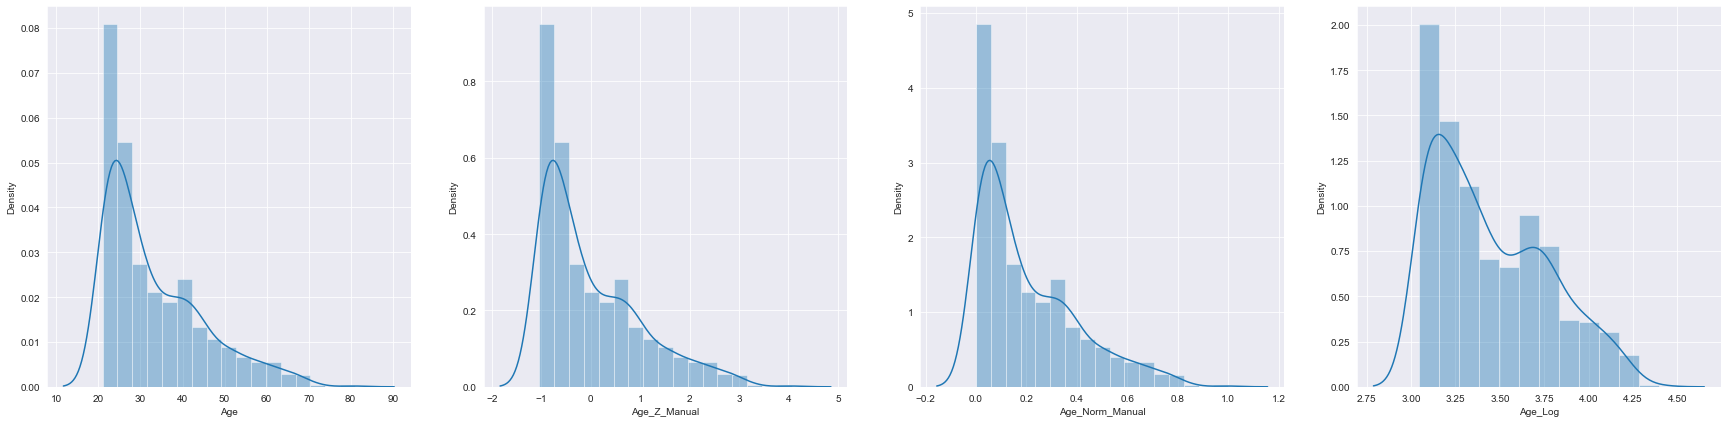

In [32]:
# Let's plot original, standardized, normalized, and log transformed Age fields
fig, axs = plt.subplots(ncols = 4, figsize = (30, 7))

sns.distplot(df['Age'], ax = axs[0])
sns.distplot(df['Age_Z_Manual'], ax = axs[1])
sns.distplot(df['Age_Norm_Manual'], ax = axs[2])
sns.distplot(df['Age_Log'], ax = axs[3]);

#### Insights

- Log normalization creates a narrower range of data with smaller skewness. 

# Appendix



- **warnings.filterwarnings("ignore")** : Never print matching warnings
- **Pandas** : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
- **Numpy** : The fundamental package for scientific computing with Python.
- **Matplotlib** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- **Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- **scipy.stats** : This module contains a large number of probability distributions as well as a growing library of statistical functions.
- **sklearn.preprocessing** : This package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.